In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [69]:
temp_file = 'data/weather/average_temp_per_city.csv'
mean_income_file = 'data/income/mean_income_city.csv'
median_income_file = 'data/income/median_income_city.csv'
listing_summary_file = 'data/car_sales/summary_all_city.csv'
precipitation_file = 'data/weather/precipitation_by_city.csv'

temp_df = pd.read_csv(temp_file)
mean_income_df = pd.read_csv(mean_income_file)
median_income_df = pd.read_csv(median_income_file)
listing_summary_df = pd.read_csv(listing_summary_file)
precipitation_df = pd.read_csv(precipitation_file)
temp_df.rename(columns={'temperature Average 2017':'City'}, inplace=True)
precipitation_df.rename(columns={'Unnamed: 0':'City'}, inplace = True)

print(temp_df)
print(mean_income_df)
print(median_income_df)
print(listing_summary_df)
print(precipitation_df)

            City    k          c
0        Atlanta  290  16.622673
1        Chicago  283  10.200573
2        Houston  294  21.054268
3          Miami  298  25.031274
4    Minneapolis  281   7.550489
5      Nashville  289  15.416306
6       New York  285  12.250406
7    San Antonio  294  20.635646
8  San Francisco  288  15.005821
9        Seattle  284  11.259626
            City           Mean
0        Atlanta   76480.661290
1        Chicago   63975.973154
2        Houston   68297.500000
3          Miami   61431.583333
4    Minneapolis   71931.660377
5      Nashville   61077.977778
6       New York   88873.627586
7    San Antonio   61195.118519
8  San Francisco  100856.922078
9        Seattle   85278.707692
            City   Median
0        Atlanta  51177.0
1        Chicago  45905.5
2        Houston  51903.0
3          Miami  45951.0
4    Minneapolis  50330.0
5      Nashville  48392.0
6       New York  68128.0
7    San Antonio  46222.0
8  San Francisco  84786.0
9        Seattle  75283.0

In [70]:
frames = [temp_df, mean_income_df, median_income_df, listing_summary_df]

combined_df = pd.merge(temp_df, mean_income_df, on='City')
combined_df = pd.merge(combined_df, median_income_df, on='City')
combined_df = pd.merge(combined_df, listing_summary_df, on='City')
combined_df = pd.merge(combined_df, precipitation_df, on='City')

print(combined_df)


            City    k          c           Mean   Median  Number of Listings  \
0        Atlanta  290  16.622673   76480.661290  51177.0                1582   
1        Chicago  283  10.200573   63975.973154  45905.5                3354   
2        Houston  294  21.054268   68297.500000  51903.0               12701   
3          Miami  298  25.031274   61431.583333  45951.0                5250   
4    Minneapolis  281   7.550489   71931.660377  50330.0                  55   
5      Nashville  289  15.416306   61077.977778  48392.0                1888   
6       New York  285  12.250406   88873.627586  68128.0                 450   
7    San Antonio  294  20.635646   61195.118519  46222.0                8078   
8  San Francisco  288  15.005821  100856.922078  84786.0                 439   
9        Seattle  284  11.259626   85278.707692  75283.0                1524   

   Average Price  Average Year  Average Mileage  precipitation  
0       23417.04          2013            52539       

In [88]:
#regression function
def regression(x_value, y_value):
    y_axis = list(y_value)
    x_axis = list(x_value)
    m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
    print(f"r squared={round(m_r*m_r,3)}")
    print(f"slope = {round(m_slope,3)}")
    slope_line = m_slope*x_value+m_int
    plt.plot(x_value, slope_line, color = "r")
    
    return

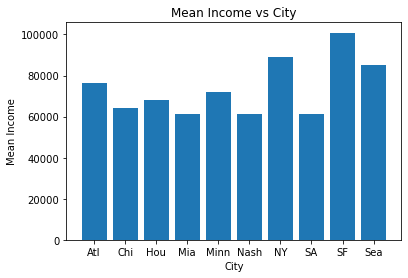

In [74]:
plt.bar(mean_income_df['City'],mean_income_df['Mean']); plt.xticks(mean_income_df['City'], ('Atl','Chi','Hou','Mia','Minn','Nash','NY','SA', 'SF','Sea'))
plt.xticks(rotation=0)
plt.xlabel("City")
plt.title("Mean Income vs City")
plt.ylabel("Mean Income")

plt.savefig('data/Figures/Mean Income vs City.png')

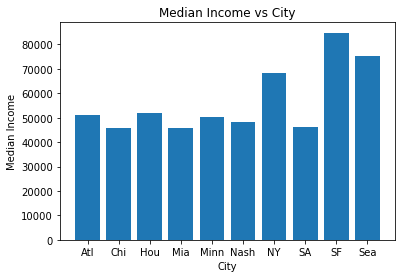

In [76]:
plt.bar(median_income_df['City'],median_income_df['Median']); plt.xticks(median_income_df['City'], ('Atl','Chi','Hou','Mia','Minn','Nash','NY','SA', 'SF','Sea'))
plt.xticks(rotation=0)
plt.xlabel("City")
plt.title("Median Income vs City")
plt.ylabel("Median Income")
plt.savefig('data/Figures/Median Income vs City.png')

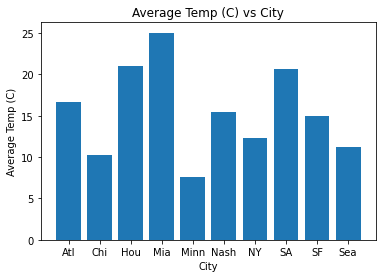

In [77]:
plt.bar(temp_df['City'],temp_df['c']); plt.xticks(temp_df['City'], ('Atl','Chi','Hou','Mia','Minn','Nash','NY','SA', 'SF','Sea'))
plt.xticks(rotation=0)
plt.xlabel("City")
plt.title("Average Temp (C) vs City")
plt.ylabel("Average Temp (C)")
plt.savefig('data/Figures/Average Temp (C) vs City.png')

r squared=0.468
slope = 509.423


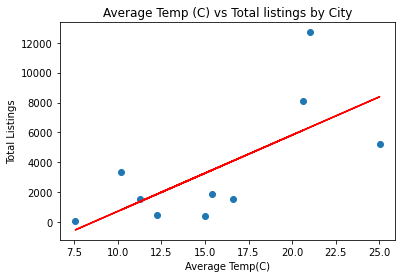

In [97]:
plt.scatter(combined_df['c'], combined_df['Number of Listings'])
plt.xlabel("Average Temp(C)")
plt.title("Average Temp (C) vs Total listings by City")
plt.ylabel("Total Listings")
regression(combined_df['c'], combined_df['Number of Listings'])
plt.savefig('data/Figures/Average Temp (C) vs Total listings by City.png')

r squared=0.262
slope = -0.152


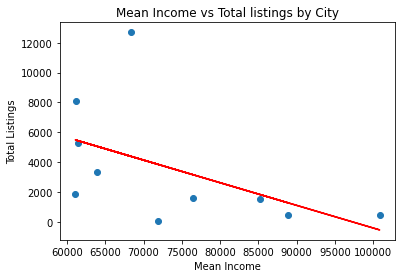

In [98]:
plt.scatter(combined_df['Mean'], combined_df['Number of Listings'])
plt.xlabel("Mean Income")
plt.title("Mean Income vs Total listings by City")
plt.ylabel("Total Listings")
regression(combined_df['Mean'], combined_df['Number of Listings'])
plt.savefig('data/Figures/Mean Income vs Total listings by City.png')

r squared=0.185
slope = -0.125


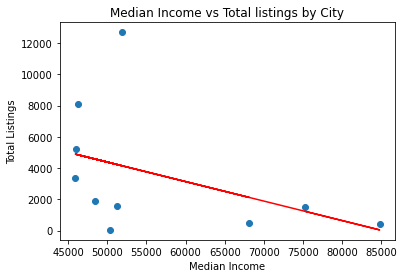

In [99]:
plt.scatter(combined_df['Median'], combined_df['Number of Listings'])
plt.xlabel("Median Income")
plt.title("Median Income vs Total listings by City")
plt.ylabel("Total Listings")
regression(combined_df['Median'], combined_df['Number of Listings'])
plt.savefig('data/Figures/Median Income vs Total listings by City.png')

r squared=0.002
slope = 0.013


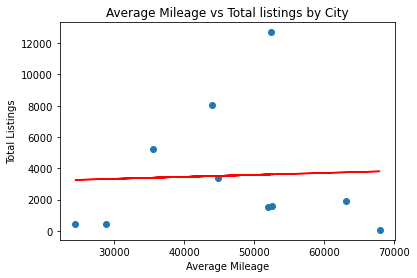

In [100]:
plt.scatter(combined_df['Average Mileage'], combined_df['Number of Listings'])
plt.xlabel("Average Mileage")
plt.title("Average Mileage vs Total listings by City")
plt.ylabel("Total Listings")
regression(combined_df['Average Mileage'], combined_df['Number of Listings'])
plt.savefig('data/Figures/Average Mileage vs Total listings by City.png')

r squared=0.216
slope = -0.465


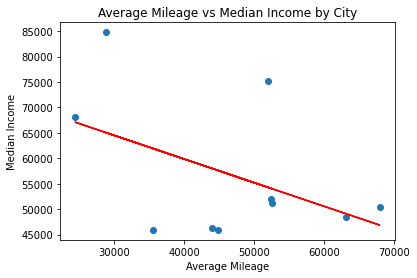

In [101]:
plt.scatter(combined_df['Average Mileage'], combined_df['Median'])
plt.xlabel("Average Mileage")
plt.title("Average Mileage vs Median Income by City")
plt.ylabel("Median Income")
regression(combined_df['Average Mileage'], combined_df['Median'])
plt.savefig('data/Figures/Average Mileage vs Median Income by City')

r squared=0.071
slope = -0.0


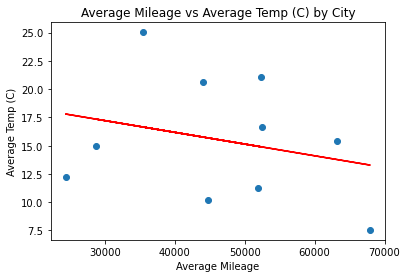

In [102]:
plt.scatter(combined_df['Average Mileage'], combined_df['c'])
plt.xlabel("Average Mileage")
plt.title("Average Mileage vs Average Temp (C) by City")
plt.ylabel("Average Temp (C)")
regression(combined_df['Average Mileage'], combined_df['c'])
plt.savefig('data/Figures/Average Mileage vs Average Temp (C) by City')

r squared=0.04
slope = -0.007


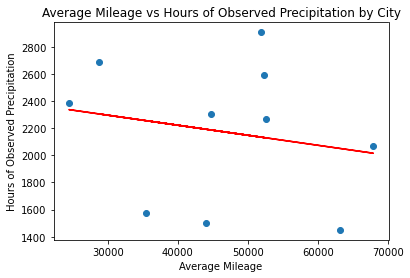

In [95]:
plt.scatter(combined_df['Average Mileage'], combined_df['precipitation'])
plt.xlabel("Average Mileage")
plt.title("Average Mileage vs Hours of Observed Precipitation by City")
plt.ylabel("Hours of Observed Precipitation")
regression(combined_df['Average Mileage'], combined_df['precipitation'])

r squared=0.019
slope = -0.017


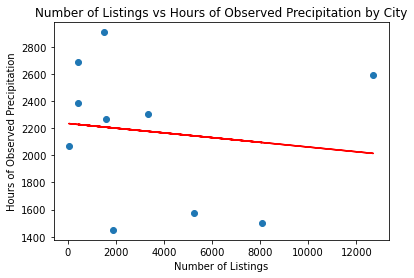

In [96]:
plt.scatter(combined_df['Number of Listings'], combined_df['precipitation'])
plt.xlabel("Number of Listings")
plt.title("Number of Listings vs Hours of Observed Precipitation by City")
plt.ylabel("Hours of Observed Precipitation")
regression(combined_df['Number of Listings'], combined_df['precipitation'])